# As análises serão sobre o formulário de satisfação.

1. A estrtura será o nome, 
2. E-mail ou telefone: a pessoa pode definir, 
3. Rating sendo de 1 até 5, onde 1 é ruim e 5 perfeito. 
4. Por último a opinião em campo aberto para a pessoa descrever como foi sua experiência.

In [1]:
##---------------------( Importar as bibliotecas )---------------------##
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

##---------------------( Carregar os dados )---------------------##
# dados = pd.read_excel('Dados-Analise-IA.xlsx', sheet_name='Cadastro')

dados = pd.read_csv('arquivo-dados-pesquisa-satisfacao.csv', sep=',')

# Primeira análise será pelo cadastro do visitante.


In [2]:
dados

,nome,emailoutelefone,rating,opiniao
0,Carlos Silva,Carlos.Silva@gmail.com,5,Adorei o atendimento! O time foi extremamente...
1,Ana Paula,Ana_Paula@linkedin.com,4,Muito bom o serviço mas a espera poderia ser ...
2,Roberto Almeida,(11) 9300-0003,5,O atendimento foi ok mas acho que há espaço p...
3,Fernanda Costa,Fernanda.Costa@gmail.com,2,Não fiquei muito satisfeito. Demorou para ser...
4,Lucas Martins,Lucas.Martins@linkedin.com,1,Péssimo atendimento. Não resolveram meu probl...
5,Patrícia Sousa,(11) 9600-0006,5,Excelente experiência! Atendentes educados e ...
6,Ricardo Gomes,Ricardo_Gomes@gmail.com,5,Gostei bastante mas acho que poderiam ter mai...
7,Márcia Lima,Marcia_Lima_Pereira@linkedin.com,3,Foi razoável. Esperava mais baseado nas recom...
8,Tiago Pereira,(11) 9900-0009,3,A equipe pareceu confusa e demorou a encontra...
9,Juliana Machado,Juliana__Machado@gmail.com,1,Muito insatisfeito. Não voltarei a utilizar e...


In [3]:
tabela = pd.DataFrame(dados)
tabela.head()

,nome,emailoutelefone,rating,opiniao
0,Carlos Silva,Carlos.Silva@gmail.com,5,Adorei o atendimento! O time foi extremamente...
1,Ana Paula,Ana_Paula@linkedin.com,4,Muito bom o serviço mas a espera poderia ser ...
2,Roberto Almeida,(11) 9300-0003,5,O atendimento foi ok mas acho que há espaço p...
3,Fernanda Costa,Fernanda.Costa@gmail.com,2,Não fiquei muito satisfeito. Demorou para ser...
4,Lucas Martins,Lucas.Martins@linkedin.com,1,Péssimo atendimento. Não resolveram meu probl...


In [4]:
tabela = tabela.rename(columns={'emailoutelefone': 'Tipo-Contato'})
tabela

,nome,Tipo-Contato,rating,opiniao
0,Carlos Silva,Carlos.Silva@gmail.com,5,Adorei o atendimento! O time foi extremamente...
1,Ana Paula,Ana_Paula@linkedin.com,4,Muito bom o serviço mas a espera poderia ser ...
2,Roberto Almeida,(11) 9300-0003,5,O atendimento foi ok mas acho que há espaço p...
3,Fernanda Costa,Fernanda.Costa@gmail.com,2,Não fiquei muito satisfeito. Demorou para ser...
4,Lucas Martins,Lucas.Martins@linkedin.com,1,Péssimo atendimento. Não resolveram meu probl...
5,Patrícia Sousa,(11) 9600-0006,5,Excelente experiência! Atendentes educados e ...
6,Ricardo Gomes,Ricardo_Gomes@gmail.com,5,Gostei bastante mas acho que poderiam ter mai...
7,Márcia Lima,Marcia_Lima_Pereira@linkedin.com,3,Foi razoável. Esperava mais baseado nas recom...
8,Tiago Pereira,(11) 9900-0009,3,A equipe pareceu confusa e demorou a encontra...
9,Juliana Machado,Juliana__Machado@gmail.com,1,Muito insatisfeito. Não voltarei a utilizar e...


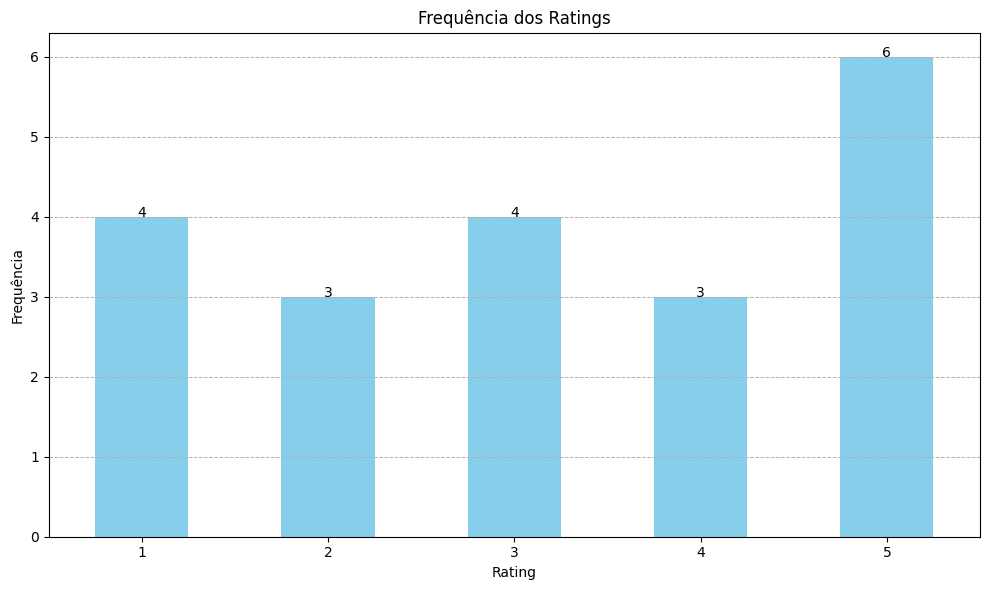

In [5]:
# Criação do gráfico de barras para a frequência dos ratings com a quantidade em cada barra
plt.figure(figsize=(10, 6))
ratings = tabela['rating'].value_counts().sort_index()
ratings.plot(kind='bar', color='skyblue')
plt.title('Frequência dos Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequência')
plt.xticks(rotation=0)

# Adicionando a quantidade em cada barra para eu saber onde está o volume maior
for index, value in enumerate(ratings):
    plt.text(index, value, str(value), ha='center')

plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


In [6]:
tabela['rating'].mean()

3.2

# Análise sobre as notas recebidas

Nossa média está em 3.2 o que mostra que está na média, mas esperamos chegar e 4 ou 5 que é acima das expectativas dos clientes. 
Isso demonstra que temos que trabalhar muito para melhorar o nosso atendimento.

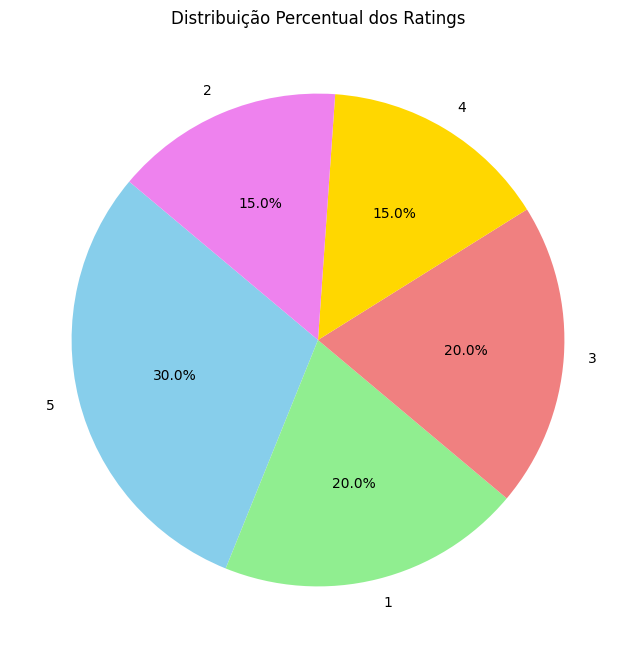

In [7]:
# Criação do gráfico de pizza para a distribuição percentual dos ratings
plt.figure(figsize=(8, 8))
tabela['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'violet'])
plt.title('Distribuição Percentual dos Ratings')
plt.ylabel('')  # Esconde a label 'Rating'
plt.show()


# Análise para saber a proporção em % da nota recebida

Vemos que somente 30% do nosso público amam ou consideram nosso atendimento de excelência. Desejamos trabalhar em cima dos clientes que deram notas entre 2 e 3 pois representam 35% do nosso público e não estão totalmente insatisfeitos.

In [8]:
tabela['Contato'] = ""
tabela['Contato'] = tabela['Tipo-Contato'].apply(lambda x: 'Email' if '@' in x else 'Telefone')


In [9]:
tabela

,nome,Tipo-Contato,rating,opiniao,Contato
0,Carlos Silva,Carlos.Silva@gmail.com,5,Adorei o atendimento! O time foi extremamente...,Email
1,Ana Paula,Ana_Paula@linkedin.com,4,Muito bom o serviço mas a espera poderia ser ...,Email
2,Roberto Almeida,(11) 9300-0003,5,O atendimento foi ok mas acho que há espaço p...,Telefone
3,Fernanda Costa,Fernanda.Costa@gmail.com,2,Não fiquei muito satisfeito. Demorou para ser...,Email
4,Lucas Martins,Lucas.Martins@linkedin.com,1,Péssimo atendimento. Não resolveram meu probl...,Email
5,Patrícia Sousa,(11) 9600-0006,5,Excelente experiência! Atendentes educados e ...,Telefone
6,Ricardo Gomes,Ricardo_Gomes@gmail.com,5,Gostei bastante mas acho que poderiam ter mai...,Email
7,Márcia Lima,Marcia_Lima_Pereira@linkedin.com,3,Foi razoável. Esperava mais baseado nas recom...,Email
8,Tiago Pereira,(11) 9900-0009,3,A equipe pareceu confusa e demorou a encontra...,Telefone
9,Juliana Machado,Juliana__Machado@gmail.com,1,Muito insatisfeito. Não voltarei a utilizar e...,Email


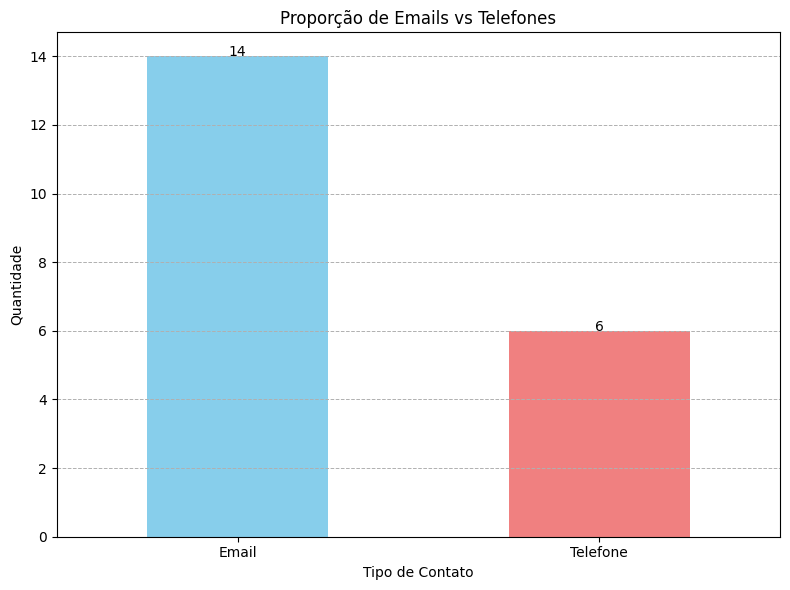

In [10]:
# Contando a quantidade de emails e telefones
contato_counts = tabela['Contato'].value_counts()

plt.figure(figsize=(8, 6))
contato_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Proporção de Emails vs Telefones')
plt.xlabel('Tipo de Contato')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

for index, value in enumerate(contato_counts):
    plt.text(index, value, str(value), ha='center')
    
plt.show()


# Análise para saber onde posso encaminhar promoções e comunicados

Vejo que mais de 60% das opções de cadastro da opinião é com base em e-mail, esse será o canal que podemos encaminhar as novas promoções e fazer o contato com o cliente.